영상을 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 영상 데이터셋 생성을 해보고, 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성 및 학습 시켜보겠습니다.

---
### 데이터셋 준비

임의의 픽셀 수를 가지는 영상을 생성합니다.

In [7]:
import numpy as np

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

In [8]:
x_train, y_train = generate_dataset(1000)
x_test, y_test = generate_dataset(100)

만든 데이터셋 일부를 가시화 해보겠습니다.

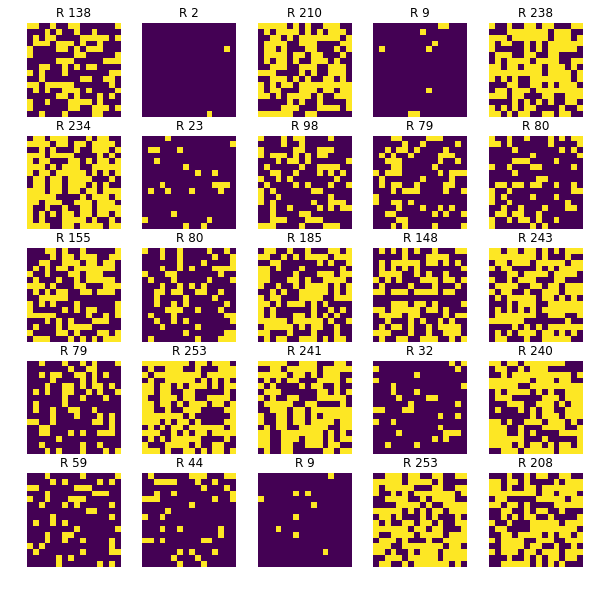

In [3]:
# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R ' + str(y_train[i][0]))

plt.show()

---
### 레이어 준비

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `다층퍼셉트론 모델`, `컨볼루션 신경망 모델`을 준비했습니다.

#### 다층퍼셉트론 모델

    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim = width*height))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))

#### 컨볼루션 신경망 모델

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))


---
### 학습과정 정의

In [4]:
model.compile(loss='mse', optimizer='rmsprop')

NameError: name 'model' is not defined

---
### 전체 소스

앞서 살펴본 `다층퍼셉트론 모델`, `컨볼루션 신경망 모델`의 전체 소스는 다음과 같습니다. 

#### 다층퍼셉트론 소스

In [ ]:
import numpy as np

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

x_train, y_train = generate_dataset(1000)
x_test, y_test = generate_dataset(100)

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop')

model.fit(x_train_1d, y_train, batch_size=32, epochs=1000)

score = model.evaluate(x_test_1d, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test_1d, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 3380.1941     
Epoch 2/1000
1000/1000 [==============================] - 0s - loss: 447.5147     
Epoch 3/1000
1000/1000 [==============================] - 0s - loss: 336.0275     
Epoch 4/1000
1000/1000 [==============================] - 0s - loss: 313.5948     
Epoch 5/1000
1000/1000 [==============================] - 0s - loss: 343.9385     
Epoch 6/1000
1000/1000 [==============================] - 0s - loss: 260.5328     
Epoch 7/1000
1000/1000 [==============================] - 0s - loss: 299.1143     
Epoch 8/1000
1000/1000 [==============================] - 0s - loss: 302.2859     
Epoch 9/1000
1000/1000 [==============================] - 0s - loss: 260.8124     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 246.4168     
Epoch 11/1000
1000/1000 [==============================] - 0s - loss: 241.8669     
Epoch 12/1000
1000/1000 [==============================] - 0s - loss: 205.8373     


#### 컨볼루션 신경망 소스

In [ ]:
import numpy as np

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

x_train, y_train = generate_dataset(1000)
x_test, y_test = generate_dataset(100)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop')
model.fit(x_train, y_train, batch_size=32, epochs=1000)

score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test_1d, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

---

### 학습결과 비교

N/A

---

### 결론

N/A

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)